# DMC 2022 - Exploration

You can download the data [here](https://www.data-mining-cup.com/dmc-2022/).

## Data Loading

In [1]:
import ast

import pandas as pd


# unnecessary options (hinted in task, but default or recognized by pandas): header=0, escapechar=None, encoding='utf-8'
category_hierarchy = pd.read_csv('data/category_hierarchy.csv', sep='|')
items = pd.read_csv('data/items.csv', sep='|')
items['categories'] = items['categories'].fillna('[]').apply(ast.literal_eval)  # make proper list
orders = pd.read_csv('data/orders.csv', sep='|')
submission = pd.read_csv('data/submission.csv', sep='|')

## Category Hierarchy 

In [2]:
category_hierarchy

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


In [3]:
print('Number of categories:', category_hierarchy['category'].nunique())
print('Number of parent categories:', category_hierarchy['parent_category'].nunique())

Number of categories: 4300
Number of parent categories: 697


A few categories have two or three parent categories, while most categories only have one parent category:

In [4]:
category_hierarchy['category'].value_counts().value_counts()

1    4269
2      30
3       1
Name: category, dtype: int64

Many parent categories only have few subcategories, though some have more:

In [5]:
category_hierarchy['parent_category'].value_counts()

3898    486
2364    173
2231     35
3027     28
1666     26
       ... 
1321      1
2113      1
3691      1
22        1
3897      1
Name: parent_category, Length: 697, dtype: int64

In [6]:
category_hierarchy['parent_category'].value_counts().describe().round(1)

count    697.0
mean       6.2
std       19.7
min        1.0
25%        3.0
50%        4.0
75%        7.0
max      486.0
Name: parent_category, dtype: float64

## Items

In [7]:
items

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,[]
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


Each `itemID` only occurs once, which makes sense:

In [8]:
len(items) == items['itemID'].nunique()

True

Distribution of brands is rather imbalanced, some of them occur in > 100 items, but most of them only occurs a few times, as there are many brands in the dataset:

In [9]:
items['brand'].value_counts()

322     1780
1040     390
1383     343
1111     329
406      327
        ... 
757        1
1310       1
118        1
1068       1
96         1
Name: brand, Length: 1515, dtype: int64

In [10]:
items['brand'].value_counts().describe().round(1)

count    1515.0
mean       21.6
std        62.3
min         1.0
25%         1.0
50%         4.0
75%        17.0
max      1780.0
Name: brand, dtype: float64

The dataset has five categorical features, for which `-1` marks missing values.

Three of the features only have a few values:

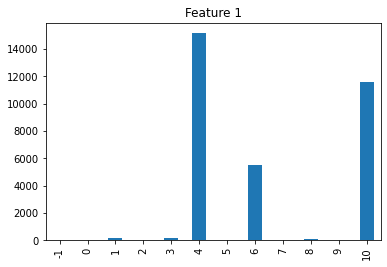

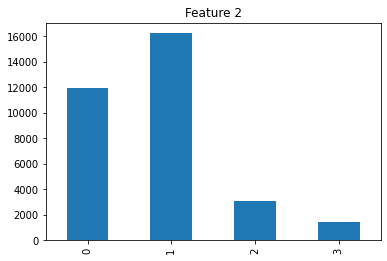

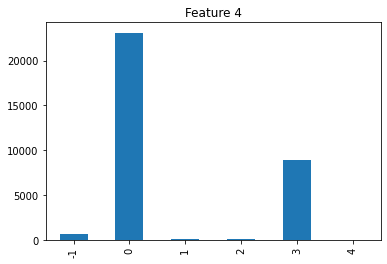

In [11]:
import matplotlib.pyplot as plt

for feature_id in [1, 2, 4]:
    items[f'feature_{feature_id}'].value_counts().sort_index().plot.bar(title=f'Feature {feature_id}')
    plt.show()

The two remaining features have more distinct values, which also show an imbalanced distribution:

In [12]:
for feature_id in [3, 5]:
    print(items[f'feature_{feature_id}'].value_counts().describe().round(1))
    print()

count     540.0
mean       60.7
std       263.3
min         1.0
25%         3.0
50%         9.5
75%        28.0
max      3964.0
Name: feature_3, dtype: float64

count     192.0
mean      170.7
std       451.1
min         1.0
25%         9.0
50%        38.0
75%       143.5
max      4264.0
Name: feature_5, dtype: float64



Items might belong to zero, one, or multiple categories:

In [13]:
items['categories'].apply(len).value_counts().sort_index()

0     6788
1     6564
2     6877
3     4447
4     2696
5     1689
6     1220
7      863
8      555
9      308
10     246
11     166
12     116
13      83
14      50
15      34
16      22
17      14
18       7
19       6
20       7
21       5
22       5
23       2
24       1
25       1
29       1
33       2
35       1
Name: categories, dtype: int64

Most categories only appear for a few items, some categories (including "no category") appear for a significant number of items:

In [14]:
items['categories'].explode().fillna(-1).value_counts()

-1       6788
 3903    1596
 3900    1547
 3901    1467
 3902    1179
         ... 
 500        1
 2506       1
 3602       1
 3247       1
 440        1
Name: categories, Length: 3361, dtype: int64

In [15]:
items['categories'].explode().fillna(-1).value_counts().describe().round(1)

count    3361.0
mean       26.7
std       138.2
min         1.0
25%         3.0
50%         7.0
75%        19.0
max      6788.0
Name: categories, dtype: float64

## Orders

In [16]:
orders

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1
...,...,...,...,...
1071533,2021-01-31,22114,29567,2
1071534,2021-01-31,22114,21068,1
1071535,2021-01-31,10900,18270,1
1071536,2021-01-31,17894,31265,5


The demand for items is imbalanced, many only occur in a few transactions:

In [17]:
orders['itemID'].value_counts()

29657    10446
18630     8513
20131     4963
16059     4377
11251     4343
         ...  
9883         1
20621        1
20386        1
9672         1
11196        1
Name: itemID, Length: 31756, dtype: int64

In [18]:
orders['itemID'].value_counts().describe().round(1)

count    31756.0
mean        33.7
std        143.5
min          1.0
25%          2.0
50%          5.0
75%         20.0
max      10446.0
Name: itemID, dtype: float64

If a user orders something on a certain date, they typically order just a few distinct items:

In [19]:
orders.groupby(['date', 'userID'])['itemID'].nunique().value_counts().sort_index()

1     91611
2     86888
3     71081
4     46793
5     26931
6     15249
7      8642
8      4929
9      2744
10     1674
11      979
12      647
13      431
14      277
15      157
16      125
17       73
18       55
19       52
20       20
21       26
22        8
23        6
24        6
25        2
26        3
27        5
28        2
29        4
31        2
32        1
35        2
37        2
42        1
Name: itemID, dtype: int64

There are a few cases where the same item appears twice or thrice for a user on a certain date:

In [20]:
orders.groupby(['date', 'userID', 'itemID']).nunique().value_counts()

order
1        1070752
2            264
3              4
dtype: int64

In [21]:
print('There are', orders['date'].nunique(), 'days in the dataset.')

There are 245 days in the dataset.


Most users order on several days, but not on many days overall:

In [22]:
orders.groupby('userID')['date'].nunique().describe().round(1)

count    46138.0
mean         7.8
std          4.1
min          1.0
25%          5.0
50%          7.0
75%         10.0
max         70.0
Name: date, dtype: float64

In most of the cases, users order a particular item only on one day at all
(so "no replenishment" would be a proper baseline for user-item combinations):

In [23]:
orders.groupby(['userID', 'itemID'])['date'].nunique().value_counts().sort_index()

1     783122
2      78507
3      21085
4       7629
5       3146
6       1401
7        703
8        352
9        183
10       106
11        80
12        37
13        21
14        13
15        14
16         4
17         5
18         2
19         5
20         1
21         2
22         1
23         2
25         1
26         2
28         1
29         1
Name: date, dtype: int64

Each item in a transaction typically is ordered only a few times:

In [24]:
orders['order'].value_counts().sort_index()

1      846264
2      143601
3       40444
4       17534
5       12579
6        4138
7         895
8        1793
9          89
10       2438
11         75
12        286
13         27
14         34
15        285
16         43
17          8
18         12
19          4
20        492
21         12
22         11
23          3
24         14
25         87
26          6
27          1
28          3
29          1
30        127
31          4
32          2
34          1
35          8
40         48
43          1
48          1
49          1
50         90
51          1
60          9
63          1
65          1
70          3
75          1
80          4
85          1
90          1
93          1
98          1
100        52
Name: order, dtype: int64

## Submission

In [25]:
submission

,userID,itemID,prediction
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
...,...,...,...
9995,46118,20106,NaN
9996,46124,19677,NaN
9997,46125,12878,NaN
9998,46127,7963,NaN


As stated in the task, the users and items in the `submission` file are a subset of those in the `orders` file:

In [26]:
pd.Series(submission['userID'].unique()).isin(orders['userID']).all()

True

In [27]:
pd.Series(submission['itemID'].unique()).isin(orders['itemID']).all()

True

In fact, each user-item combination in the `submission` file occured at least once in the `orders` file:

In [28]:
len(submission[['userID', 'itemID']].merge(orders[['userID', 'itemID']].drop_duplicates())) == len(submission)

True

In [29]:
print(submission['userID'].nunique(), 'out of', orders['userID'].nunique(), 'users.')
print(submission['itemID'].nunique(), 'out of', orders['itemID'].nunique(), 'items.')

7251 out of 46138 users.
3856 out of 31756 items.


Naturally, each user-item combination in the `submission` file only occurs once:

In [30]:
(submission.groupby(['userID', 'itemID']).size() == 1).all()

True